In [1]:
import sys
sys.path.append('/home/jleland/Coding/Projects/flopter')
import numpy as np
import scipy as sp
import magopter as mgt
import lputils as lpu
import matplotlib.pyplot as plt
import fitters as ftr

/home/jleland/Coding/Environments/python3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jleland/Coding/Environments/python3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [54]:
t = np.linspace(0,0.1,200)
v_f = -15
v_p = np.linspace(-100, 5, 200)
oscillation_f = 20000
oscillation_amplitude = 1.2
v_o = oscillation_amplitude * np.sin(t * 2 * np.pi * oscillation_f)

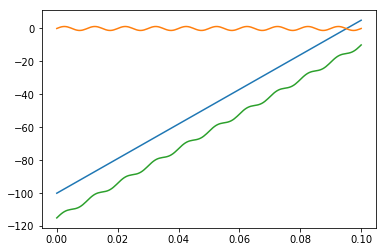

In [55]:
plt.figure()
plt.plot(t, v_p)
plt.plot(t, v_o)
plt.plot(t, v_o + v_f + v_p)

In [56]:
T_e = 6 # eV
I_0 = 1.2 # A

V_o = (v_f - v_p - v_o) / T_e
i_o = I_0 * (1 - np.exp(-V_o))

V = (v_f - v_p) / T_e
i = I_0 * (1 - np.exp(-V))

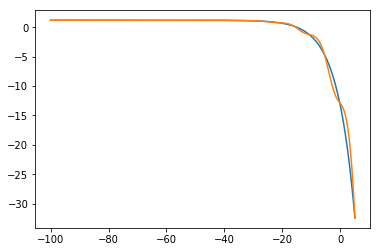

In [57]:
plt.figure()
plt.plot(v_p, i)
plt.plot(v_p, i_o)

(-5, 1.8)

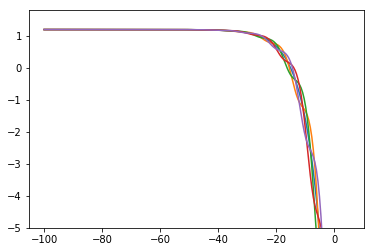

In [58]:
plt.figure()
plt.plot(v_p, i, label='Analytical')
for phase in [0, np.pi/2, np.pi, 3*np.pi/2]:
    v_o = oscillation_amplitude * np.sin((t * 2 * np.pi * oscillation_f) + phase)
    V_o = (v_f - v_p - v_o) / T_e
    i_o = I_0 * (1 - np.exp(-V_o))
    plt.plot(v_p, i_o, label=r'$phi$ = {}'.format(phase))
plt.ylim(-5,1.8)

(-5, 1.8)

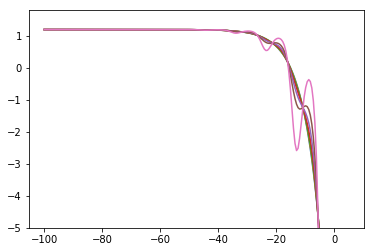

In [59]:
plt.figure()
plt.plot(v_p, i, label='Analytical')
for amplitude in [0.1,0.2,0.5,1.0,2.0,5.0]:
    v_o = amplitude * np.sin((t * 2 * np.pi * oscillation_f))
    V_o = (v_f - v_p - v_o) / T_e
    i_o = I_0 * (1 - np.exp(-V_o))
    plt.plot(v_p, i_o, label=r'$V_p_1$ = {}'.format(amplitude))
plt.ylim(-5,1.8)

**Generating n sweeps and averaging them**

In [8]:
n = 2

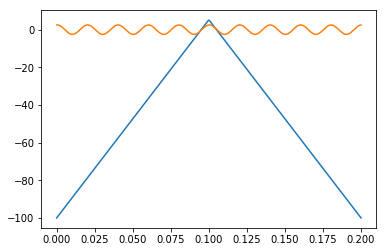

In [60]:
t_long = np.linspace(0, 0.1 * n, 200 * n)
phase = np.random.rand() * 2 * np.pi

# Stack 50 sweeps back to back, reversing every other sweep, to construct a triangle wave
v_p_long = np.concatenate([v_p if i%2==0 else np.flip(v_p) for i in range(n)])
v_o_long = 2.5 * np.sin((t_long * 2 * np.pi * oscillation_f) + phase)

plt.figure()
plt.plot(t_long, v_p_long)
plt.plot(t_long, v_o_long)

In [61]:
T_e = 6 # eV
I_0 = 1.2 # A

V_o_long = (v_f - v_p_long - v_o_long) / T_e
i_o_long = I_0 * (1 - np.exp(-V_o_long))

V_long = (v_f - v_p_long) / T_e
i_long = I_0 * (1 - np.exp(-V_long))

(0, 1.3)

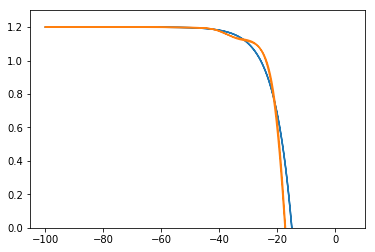

In [62]:
plt.figure()
plt.plot(v_p_long, i_long, label='Analytical')
plt.plot(v_p_long, i_o_long, label='RF Component')


# phase = np.random.rand() * 2 * np.pi
# v_o = oscillation_amplitude * np.sin((t * 2 * np.pi * oscillation_f) + phase)
# V_o = (v_f - v_p - v_o) / T_e
# i_o = I_0 * (1 - np.exp(-V_o))
# plt.plot(v_p, i_o, label=r'$phi$ = {}'.format(phase))
plt.ylim(0,1.3)

**Using the time averaged equation**

In [63]:
def modified_bessel_0(z, n=20):
    I_0 = 0
    for k in range(n):
        I_0 += ((0.25 * z**2)**k)/(np.math.factorial(k))**2
    return I_0

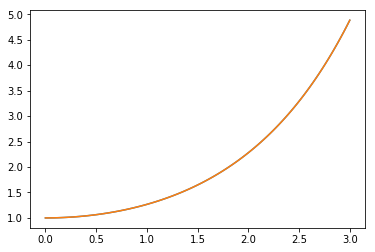

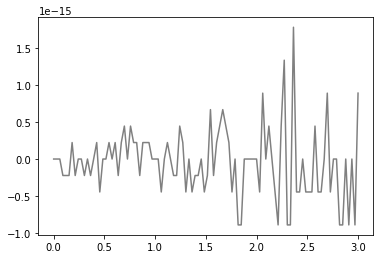

In [64]:
# Testing the bessel function produces the expected result

x = np.linspace(0, 3, 100)
bessels = np.array([modified_bessel_0(z, n=20) for z in x])
bessels_better = np.array([sp.special.i0(z) for z in x])

plt.figure()
plt.plot(x, bessels)
plt.plot(x, bessels_better)

plt.figure()
plt.plot(x, bessels - bessels_better, color='gray')

In [65]:
# The time averaged equation from the paper (10.4236/jamp.2016.49185)
delta_V = T_e * np.log(sp.special.i0(oscillation_amplitude / T_e))
print(delta_V)

j_avg = 1.2 * np.exp(-(v_f - v_p - delta_V) / T_e) - I_0
j_avg_long = 1.2 * np.exp(-(v_f - v_p_long - delta_V) / T_e) - I_0

0.05985066324805565


(0, 1.3)

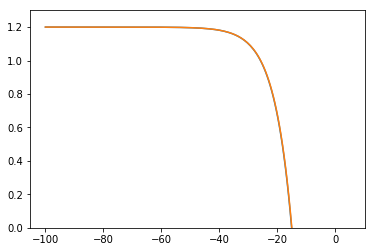

In [66]:
plt.figure()
plt.plot(v_p, -j_avg, label='Time Averaged')
plt.plot(v_p, i, label='Analytical')
plt.ylim(0,1.3)

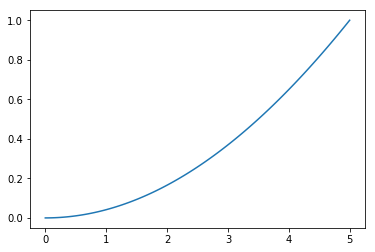

In [67]:
ampls = np.linspace(0, 5, 100)
d_Vs = np.zeros_like(ampls)

for i, ampl in enumerate(ampls):
    d_Vs[i] = T_e * np.log(sp.special.i0(ampl / T_e))
    
plt.figure()
plt.plot(ampls, d_Vs)